## Miniproject 2: MovieLens Visualization



### Download data

In [3]:
import requests

url_dict = {
     'data.csv': 'https://caltech-cs155.s3.us-east-2.amazonaws.com/sets/miniprojects/project2/data/data.csv',
     'movies.csv': 'https://caltech-cs155.s3.us-east-2.amazonaws.com/sets/miniprojects/project2/data/movies.csv'
}

def download_file(file_path):
    url = url_dict[file_path]
    print('Start downloading...')
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(file_path, 'wb') as f:
            for chunk in r.iter_content(chunk_size=1024 * 1024 * 1024):
                f.write(chunk)
    print('Complete')

download_file('data.csv')
download_file('movies.csv')

Start downloading...
Complete
Start downloading...
Complete


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import colors
from matplotlib.ticker import PercentFormatter

data = pd.read_csv('data.csv')
movies = pd.read_csv('movies.csv')

In [5]:
display(data)
display(movies)

,User ID,Movie ID,Rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1
...,...,...,...
99995,880,476,3
99996,716,204,5
99997,276,1090,1
99998,13,225,2


,Movie ID,Movie Title,Unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# **Basic Visualizations:**

First, you will create some basic visualizations of the MovieLens dataset described above. Using a method
(e.g. histograms) of your choice, visualize the following:
1. All ratings in the MovieLens Dataset.
2. All ratings of the ten most popular movies (movies which have received the most ratings).
3. All ratings of the ten best movies (movies with the highest average ratings).
4. All ratings of movies from three genres of your choice (create three separate visualizations).
Note that in Parts 2 and 3 you only need to make one combined histogram for the ten most popular movies
and one combined histogram for the ten best movies.
The Python packages Matplotlib and Seaborn are good choices for these visualizations, but there are also
many other good visualization packages

1. All ratings in the MovieLens Dataset

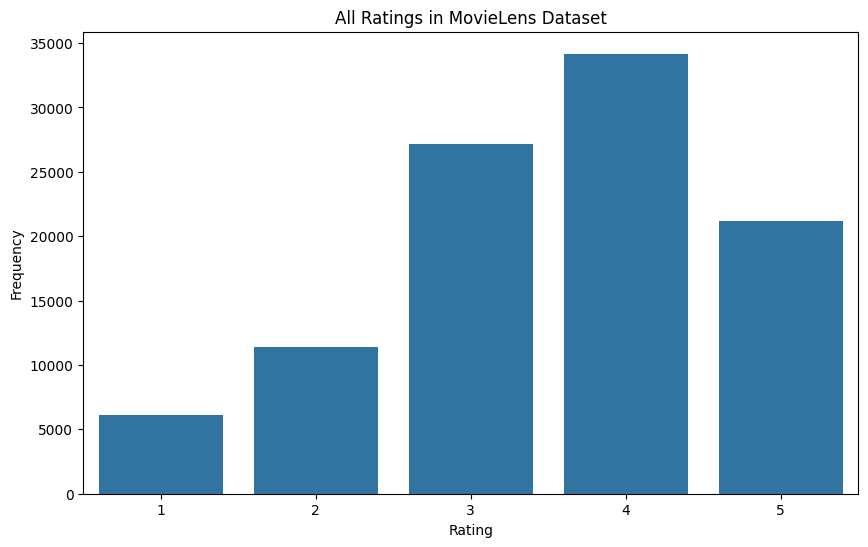

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Rating', data=data, order=sorted(data['Rating'].unique()))
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('All Ratings in MovieLens Dataset')
plt.savefig('All Ratings')
plt.show()

2. All ratings of the ten most popular movies (movies which have received the most ratings).

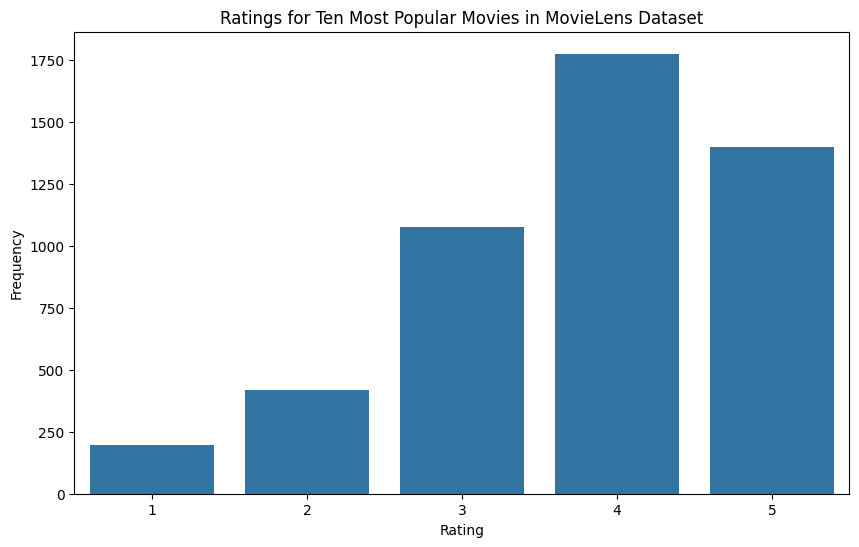

In [7]:
# plot most popular movies
most_popular = data['Movie ID'].value_counts().nlargest(10).index
popular_movies_ratings = data[data['Movie ID'].isin(most_popular)]
plt.figure(figsize=(10, 6))
sns.countplot(x='Rating', data=popular_movies_ratings, order=sorted(popular_movies_ratings['Rating'].unique()))
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Ratings for Ten Most Popular Movies in MovieLens Dataset')
plt.savefig('Ratings of Most Popular Movies')
plt.show()

3. All ratings of the ten best movies (movies with the highest average ratings).

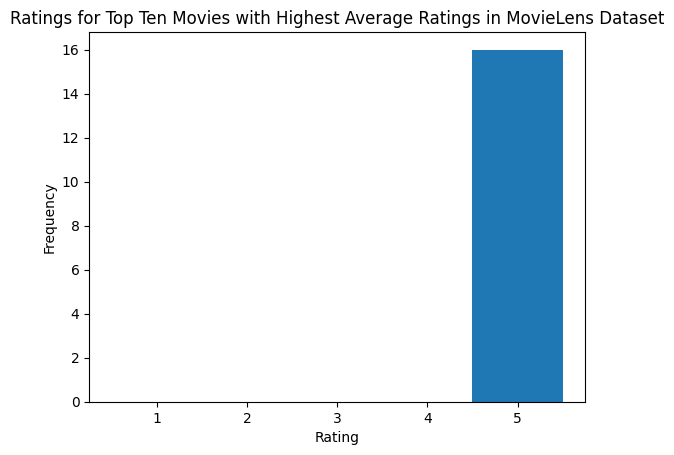

In [8]:
# top 10 average ratings
avg_rating_data = data.groupby(by='Movie ID').mean()
highest_indices = avg_rating_data.sort_values(by=['Rating'], ascending=False).nlargest(10, 'Rating').index
highest_ratings = data[data['Movie ID'].isin(highest_indices)]['Rating']

plt.hist(highest_ratings, bins=list(range(1, 7)), align='left')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Ratings for Top Ten Movies with Highest Average Ratings in MovieLens Dataset')
plt.savefig('Ratings for Top Ten Movies')
plt.show()

4. All ratings of movies from three genres of your choice (create three separate visualizations).

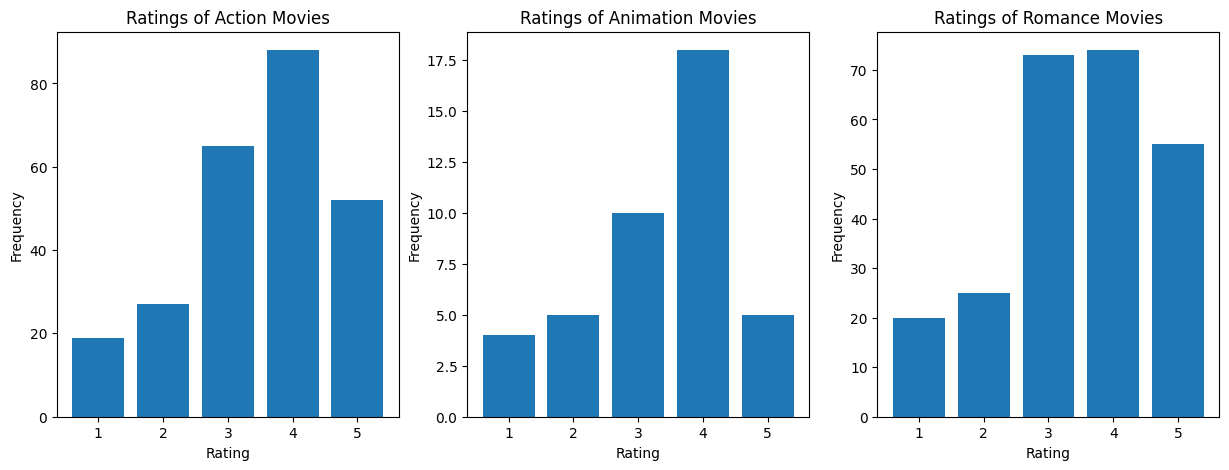

In [9]:
# all ratings of movies from genres action, animation, and romance
action_ratings = [0 for _ in range(5)]
animation_ratings = [0 for _ in range(5)]
romance_ratings = [0 for _ in range(5)]

for i in range(len(movies)):
    if movies['Action'][i] == 1:
        action_ratings[data['Rating'][i] - 1] += 1
    if movies['Animation'][i] == 1:
        animation_ratings[data['Rating'][i] - 1] += 1
    if movies['Romance'][i] == 1:
        romance_ratings[data['Rating'][i] - 1] += 1

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
rating_values = list(range(1, 6))

axs[0].bar(rating_values, action_ratings)
axs[1].bar(rating_values, animation_ratings)
axs[2].bar(rating_values, romance_ratings)

axs[0].set_xlabel('Rating')
axs[1].set_xlabel('Rating')
axs[2].set_xlabel('Rating')
axs[0].set_ylabel('Frequency')
axs[1].set_ylabel('Frequency')
axs[2].set_ylabel('Frequency')

axs[0].set_title('Ratings of Action Movies')
axs[1].set_title('Ratings of Animation Movies')
axs[2].set_title('Ratings of Romance Movies')

fig.savefig("Bar Charts of Ratings by Genre")
fig.show()

# **Matrix Factorization Visualizations:**

## Using and modifying code from Homework 5

In [10]:
# Solution Code from Homework 5
def grad_U(Ui, Yij, Vj, reg, eta):
    """
    Takes as input Ui (the ith row of U), a training point Yij, the column
    vector Vj (jth column of V^T), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Ui multiplied by eta.
    """
    grad = (reg * Ui) - ((Yij - np.dot(Ui, Vj)) * Vj)

    return eta * grad

def grad_V(Vj, Yij, Ui, reg, eta):
    """
    Takes as input the column vector Vj (jth column of V^T), a training point Yij,
    Ui (the ith row of U), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Vj multiplied by eta.
    """
    grad = (reg * Vj) - ((Yij - np.dot(Ui, Vj)) * Ui)

    return eta * grad

def get_err(U, V, Y, reg=0.0):
    """
    Takes as input a matrix Y of triples (i, j, Y_ij) where i is the index of a user,
    j is the index of a movie, and Y_ij is user i's rating of movie j and
    user/movie matrices U and V.

    Returns the mean regularized squared-error of predictions made by
    estimating Y_{ij} as the dot product of the ith row of U and the jth column of V^T.
    """
    error = 0
    N = len(Y)
    for i, j, Y_ij in Y:
        error += 0.5 * (Y_ij - np.dot(U[i - 1], V[j - 1])) ** 2
    reg_term = 0.5 * reg * (np.linalg.norm(U, ord='fro') ** 2 + np.linalg.norm(V, ord='fro') ** 2)
    return (error + reg_term) / N

def train_model(M, N, K, eta, reg, Y, eps=0.0001, max_epochs=300):
    """
    Given a training data matrix Y containing rows (i, j, Y_ij)
    where Y_ij is user i's rating on movie j, learns an
    M x K matrix U and N x K matrix V such that rating Y_ij is approximated
    by (UV^T)_ij.

    Uses a learning rate of <eta> and regularization of <reg>. Stops after
    <max_epochs> epochs, or once the magnitude of the decrease in regularized
    MSE between epochs is smaller than a fraction <eps> of the decrease in
    MSE after the first epoch.

    Returns a tuple (U, V, err) consisting of U, V, and the unregularized MSE
    of the model.
    """
    U = np.random.uniform(-0.5, 0.5, (M, K))
    V = np.random.uniform(-0.5, 0.5, (N, K))
    errors = [get_err(U, V, Y, reg)]

    for epoch in range(max_epochs):
        np.random.shuffle(Y)

        for (i, j, Y_ij) in Y:
            U[i - 1] -= grad_U(U[i - 1], Y_ij, V[j - 1], reg, eta)
            V[j - 1] -= grad_V(V[j - 1], Y_ij, U[i - 1], reg, eta)

        errors.append(get_err(U, V, Y, reg))

        if epoch == 0:
            initial_loss = np.abs(errors[0] - errors[1])
        elif epoch > 0 and (errors[epoch - 1] - errors[epoch]) / initial_loss <= eps:
            break

    return U, V, get_err(U, V, Y)

In [11]:
# allocate some data for validation to help determine hyperparameters
Y_train = data.to_numpy(dtype=int)[:80000]
Y_val = data.to_numpy(dtype=int)[80000:90000]
Y_test = data.to_numpy(dtype=int)[90000:]

M = max(max(Y_train[:, 0]), max(Y_val[:, 0])).astype(int) # users
N = max(max(Y_train[:, 1]), max(Y_val[:, 1])).astype(int) # movies

# given in spec
k = 20

# choose hyperparameters
regs = [0.01, 0.1]
etas = [0.01, 0.1]
E_ins = []
E_outs = []

for reg in regs:
    E_ins_for_lambda_eta = []
    E_outs_for_lambda_eta = []
    for eta in etas:
        print("Training model with eta = %s, reg = %s" % (eta, reg))
        U, V, err = train_model(M, N, k, eta, reg, Y_train)
        E_ins_for_lambda_eta.append(err)
        E_out = get_err(U, V, Y_val)
        E_outs_for_lambda_eta.append(E_out)
    E_ins.append(E_ins_for_lambda_eta)
    E_outs.append(E_outs_for_lambda_eta)

E_ins = np.array(E_ins)
E_outs = np.array(E_outs)

print('E_outs:\n', E_outs)
reg_index, eta_index = np.unravel_index(E_outs.argmin(), E_outs.shape)
print('E_out minimized at reg = %s, eta = %s' % (regs[reg_index], etas[eta_index]))

Training model with eta = 0.01, reg = 0.01
Training model with eta = 0.1, reg = 0.01
Training model with eta = 0.01, reg = 0.1
Training model with eta = 0.1, reg = 0.1
E_outs:
 [[0.60031189 0.79935254]
 [0.43823351 0.5332976 ]]
E_out minimized at reg = 0.1, eta = 0.01


In [12]:
# get U and V given the optimal hyperparameters

# redefine Y_train to have first 90000 training points
Y_train = data.to_numpy(dtype=int)[:90000]
Y_test = data.to_numpy(dtype=int)[90000:]

M = max(max(Y_train[:, 0]), max(Y_test[:, 0])).astype(int) # users
N = max(max(Y_train[:, 1]), max(Y_test[:, 1])).astype(int) # movies

eta = 0.01
reg = 0.1
k = 20

U, V, E_in = train_model(M, N, k, eta, reg, Y_train)
E_out = get_err(U, V, Y_test)
E_in, E_out

(0.32086841863923743, 0.44119538023142724)

**Apply SVD to V**

In [13]:
A = np.linalg.svd(V.T)[0]
V_tilda = np.dot(A[:, :2].T, V.T)
U_tilda = np.dot(A[:, :2].T, U.T)

**Visualizing the resultant latent factors**

(a) Any ten movies of your choice from the MovieLens dataset.

In [54]:
def visualize_movies(V_tilda, movie_indices, labels, title, ratings):
    fig = plt.figure(figsize=(8, 8))
    N = len(movie_indices)

    cmap = plt.cm.viridis
    norm = plt.Normalize(min(ratings), max(ratings))
    scatter = plt.scatter(V_tilda[0][movie_indices], V_tilda[1][movie_indices], c=ratings, cmap=cmap, s = 200)

    for i in range(N):
        x, y = V_tilda[0][movie_indices[i]], V_tilda[1][movie_indices[i]]
        label = labels[i]
        rating = ratings[i]
        # overlap when plotting
        if label == 'Heavy Metal (1981)':
            plt.annotate(label, (x, y), xytext=(20, -15), textcoords='offset points')
            continue
        plt.annotate(label, (x, y), xytext=(-60, 10), textcoords='offset points')

    plt.title(title)
    plt.xlabel('v1')
    plt.ylabel('v2')

    cax = fig.add_axes([0.95, 0.1, 0.03, 0.8])
    plt.colorbar(scatter, label='Average Rating', cax=cax)
    plt.clim(1, 5)
    plt.show()

[  1  35  71  78 151 231 272 393 421 457]
['Toy Story (1995)' 'Free Willy 2: The Adventure Home (1995)'
 'Lion King, The (1994)' 'Free Willy (1993)'
 'Willy Wonka and the Chocolate Factory (1971)' 'Batman Returns (1992)'
 'Good Will Hunting (1997)' 'Mrs. Doubtfire (1993)'
 "William Shakespeare's Romeo and Juliet (1996)"
 'Free Willy 3: The Rescue (1997)']
[3.87831858 2.18181818 3.78181818 2.45454545 3.63190184 2.68309859
 4.26262626 3.41145833 3.59433962 1.74074074]


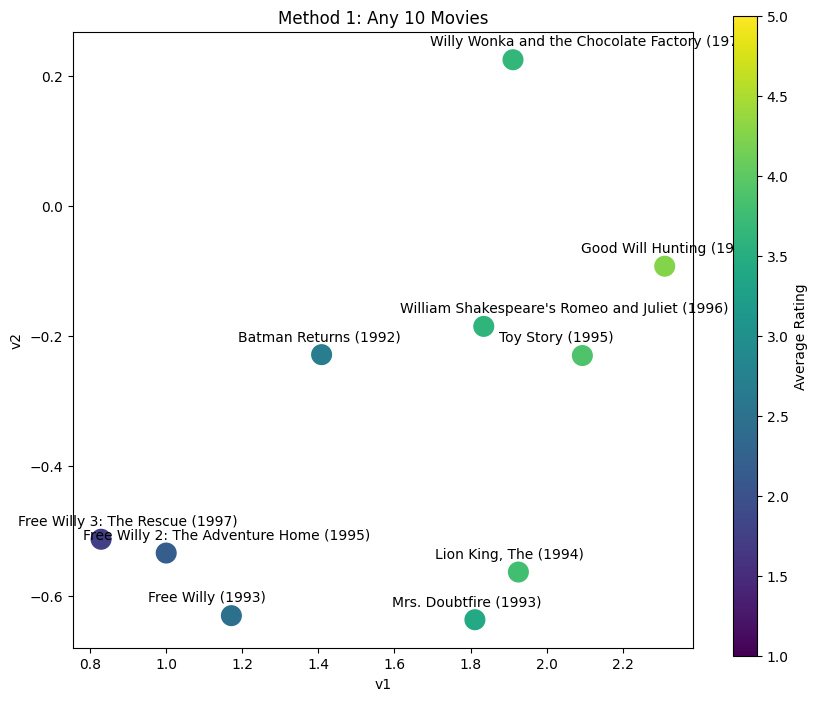

In [38]:
indices = [0, 34, 70, 77, 150, 230, 271, 392, 420, 456]
movie_ids = movies['Movie ID'][indices].to_numpy()
movie_labels = movies['Movie Title'][indices].to_numpy()
avg_rating_data = data.groupby(by='Movie ID')['Rating'].mean()
avg_ratings = avg_rating_data.iloc[indices].to_numpy()
print(movie_ids)
print(movie_labels)
print(avg_ratings)
visualize_movies(V_tilda, indices, movie_labels, 'Method 1: Any 10 Movies', avg_ratings)

(b) The ten most popular movies (movies which have received the most ratings)

[ 50 258 100 181 294 286 288   1 300 121]
['Star Wars (1977)' 'Contact (1997)' 'Fargo (1996)'
 'Return of the Jedi (1983)' 'Liar Liar (1997)'
 'English Patient, The (1996)' 'Scream (1996)' 'Toy Story (1995)'
 'Air Force One (1997)' 'Independence Day (ID4) (1996)']
[4.35849057 3.80353635 4.15551181 4.00788955 3.15670103 3.65696466
 3.44142259 3.87831858 3.63109049 3.43822844]


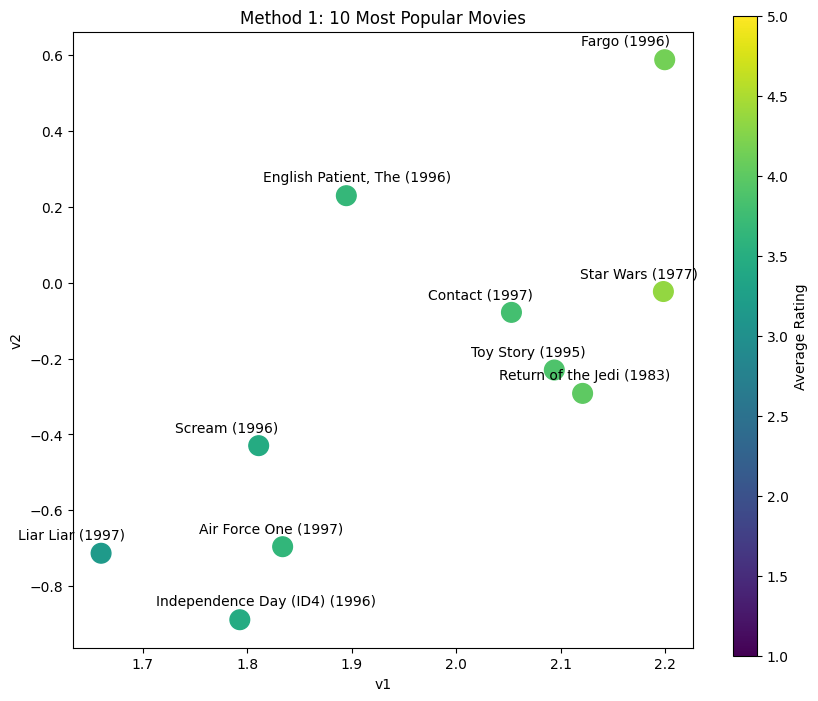

In [41]:
most_popular_ids = data['Movie ID'].value_counts().nlargest(10).index.to_numpy()
indices = [i - 1 for i in most_popular_ids]
movie_labels = movies['Movie Title'][indices].to_numpy()
avg_rating_data = data.groupby(by='Movie ID')['Rating'].mean()
avg_ratings = avg_rating_data.iloc[indices].to_numpy()
print(most_popular_ids)
print(movie_labels)
print(avg_ratings)
visualize_movies(V_tilda, indices, movie_labels, 'Method 1: 10 Most Popular Movies', avg_ratings)

(c) The ten best movies (movies with the highest average ratings).



Int64Index([50, 258, 100, 181, 294, 286, 288, 1, 300, 121], dtype='int64')
['Great Day in Harlem, A (1994)' 'They Made Me a Criminal (1939)'
 'Prefontaine (1997)' 'Marlene Dietrich: Shadow and Light (1996) '
 'Star Kid (1997)' 'Saint of Fort Washington, The (1993)'
 'Santa with Muscles (1996)' 'Aiqing wansui (1994)'
 "Someone Else's America (1995)"
 'Entertaining Angels: The Dorothy Day Story (1996)']
[5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]


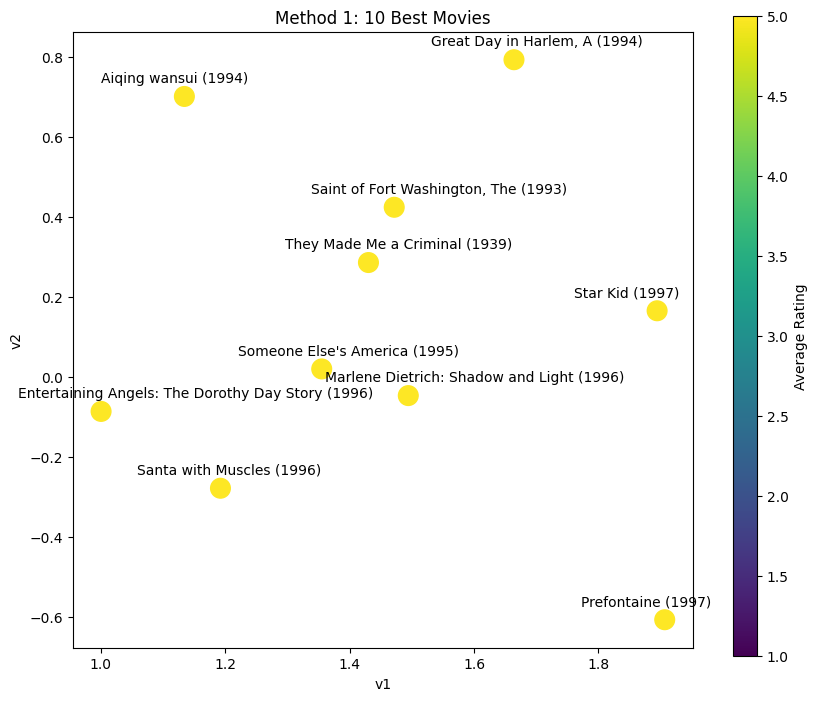

In [44]:
avg_rating_data = data.groupby(by='Movie ID')['Rating'].mean()
highest_movie_ids = avg_rating_data.nlargest(10).index
indices = [i - 1 for i in highest_movie_ids]
movie_labels = movies['Movie Title'][indices].to_numpy()
avg_ratings = avg_rating_data.iloc[indices].to_numpy()
print(most_popular)
print(movie_labels)
print(avg_ratings)
visualize_movies(V_tilda, indices, movie_labels, 'Method 1: 10 Best Movies', avg_ratings)

d) Ten movies from the three genres you selected in Section 4, Basic Visualizations (for a total of 30 movies). Create one visualization, containing ten movies, for each of the three genres you select.

Action:['Psycho (1960)' 'Belle de jour (1967)' 'Pollyanna (1960)'
 'Sling Blade (1996)' 'Star Trek: The Wrath of Khan (1982)'
 'Star Trek III: The Search for Spock (1984)' 'Grosse Pointe Blank (1997)'
 'Ghost in the Shell (Kokaku kidotai) (1995)' 'Local Hero (1983)'
 'Inventing the Abbotts (1997)']
Animation:['Jack (1996)' 'Terminator 2: Judgment Day (1991)' 'Mary Poppins (1964)'
 'E.T. the Extra-Terrestrial (1982)'
 'Big Blue, The (Grand bleu, Le) (1988)'
 'Haunted World of Edward D. Wood Jr., The (1995)'
 'To Kill a Mockingbird (1962)'
 'Last Time I Committed Suicide, The (1997)' 'Fargo (1996)'
 'Anna Karenina (1997)']
Romance:['Nadja (1994)' 'Leaving Las Vegas (1995)' 'Caught (1996)'
 'Nikita (La Femme Nikita) (1990)' 'Very Brady Sequel, A (1996)'
 "'Til There Was You (1997)" 'Target (1995)' 'Sliver (1993)'
 'Aladdin and the King of Thieves (1996)'
 'Vie est belle, La (Life is Rosey) (1987)']


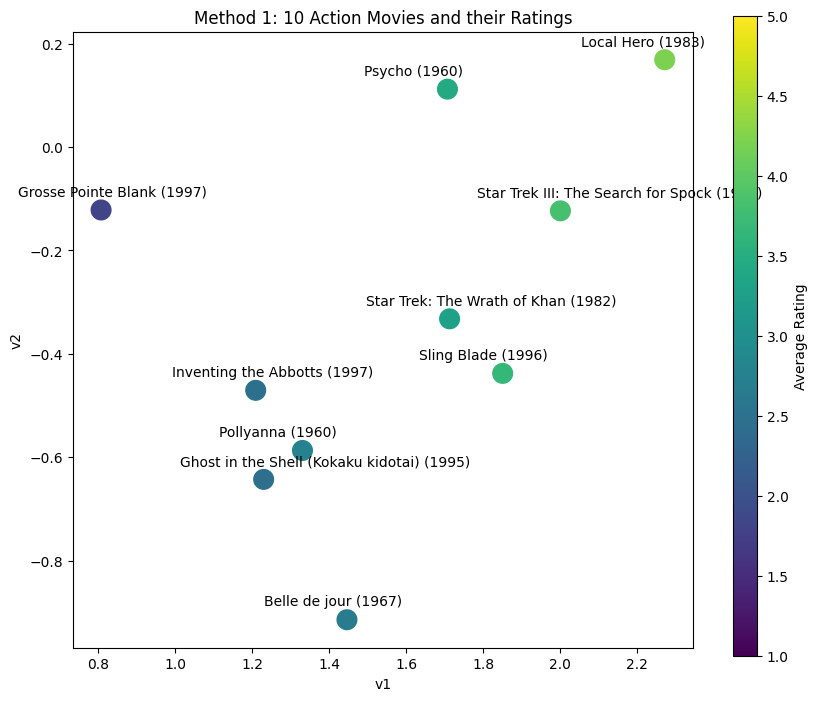

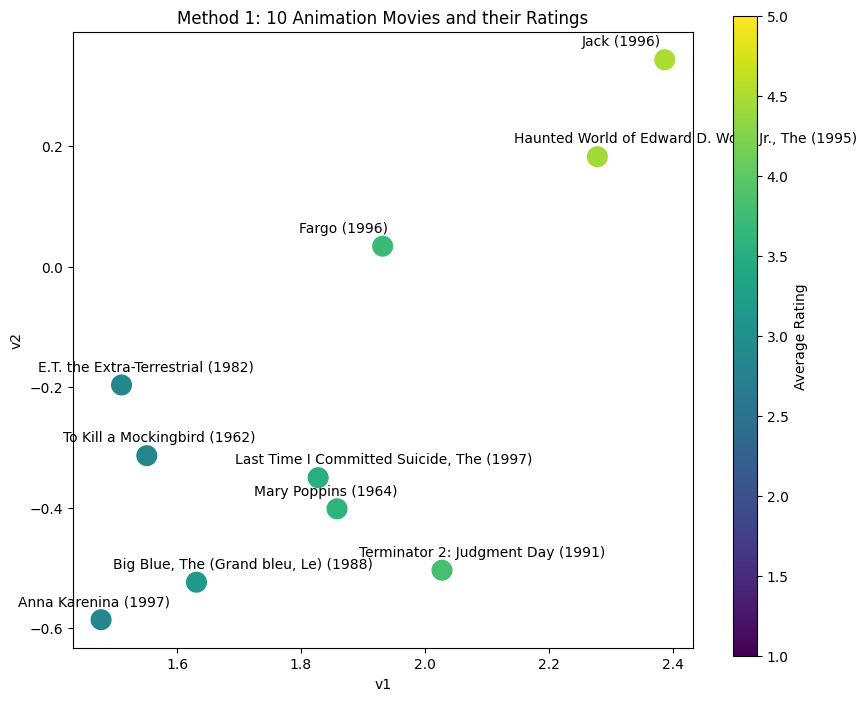

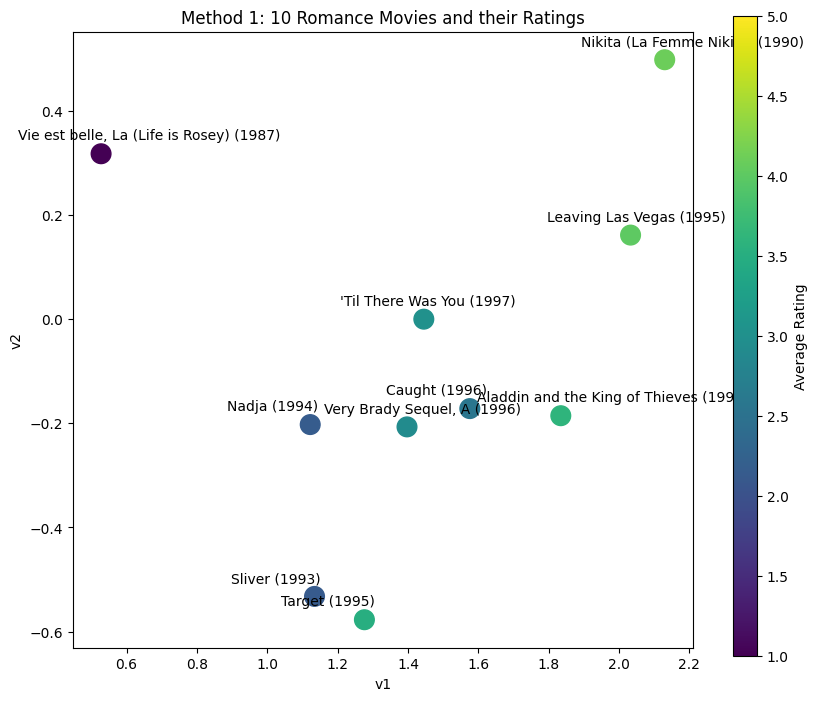

In [57]:
action = movies[movies['Action'] == 1][['Movie ID', 'Movie Title']]
animation = movies[movies['Animation'] == 1][['Movie ID', 'Movie Title']]
romance = movies[movies['Romance'] == 1][['Movie ID', 'Movie Title']]

# Sample 10 movie IDs per genre
action_movie_ids = action.sample(n=10)['Movie ID'].to_numpy()
animation_movie_ids = animation.sample(n=10)['Movie ID'].to_numpy()
romance_movie_ids = romance.sample(n=10)['Movie ID'].to_numpy()

# Calculate average ratings
avg_rating_data = data.groupby('Movie ID')['Rating'].mean()

action_labels = movies.loc[action_movie_ids, 'Movie Title'].to_numpy()
action_ratings = avg_rating_data.loc[action_movie_ids].to_numpy()

animation_labels = movies.loc[animation_movie_ids, 'Movie Title'].to_numpy()
animation_ratings = avg_rating_data.loc[animation_movie_ids].to_numpy()

romance_labels = movies.loc[romance_movie_ids, 'Movie Title'].to_numpy()
romance_ratings = avg_rating_data.loc[romance_movie_ids].to_numpy()

print('Action:{}'.format(action_labels))
print('Animation:{}'.format(animation_labels))
print('Romance:{}'.format(romance_labels))

visualize_movies(V_tilda, action_movie_ids - 1, action_labels, 'Method 1: 10 Action Movies and their Ratings', action_ratings)
visualize_movies(V_tilda, animation_movie_ids - 1, animation_labels, 'Method 1: 10 Animation Movies and their Ratings', animation_ratings)
visualize_movies(V_tilda, romance_movie_ids - 1, romance_labels, 'Method 1: 10 Romance Movies and their Ratings', romance_ratings)

## Incorporate bias terms a and b for each user and movie, to model global tendencies of the various users and movies

In [19]:
def grad_U_with_bias(Ui, Yij, Vj, ai, bj, reg, eta):
    """
    Takes as input Ui (the ith row of U), a training point Yij, the column
    vector Vj (jth column of V^T), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Ui multiplied by eta.
    """
    grad = (reg * Ui) - ((Yij - (np.dot(Ui, Vj) + ai + bj)) * Vj)

    return eta * grad

def grad_V_with_bias(Vj, Yij, Ui, ai, bj, reg, eta):
    """
    Takes as input the column vector Vj (jth column of V^T), a training point Yij,
    Ui (the ith row of U), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Vj multiplied by eta.
    """
    grad = (reg * Vj) - ((Yij - (np.dot(Ui, Vj) + ai + bj)) * Ui)

    return eta * grad

def grad_bias(Yij, Ui, Vj, ai, bj, reg, eta):
    grad = -2 * (Yij - (np.dot(Ui, Vj) + ai + bj))
    return eta * grad

def get_err_with_bias(U, V, a, b, Y, reg=0.0):
    """
    Takes as input a matrix Y of triples (i, j, Y_ij) where i is the index of a user,
    j is the index of a movie, and Y_ij is user i's rating of movie j and
    user/movie matrices U and V.

    Returns the mean regularized squared-error of predictions made by
    estimating Y_{ij} as the dot product of the ith row of U and the jth column of V^T.
    """
    error = 0
    N = len(Y)
    for i, j, Y_ij in Y:
        error += 0.5 * (Y_ij - (np.dot(U[i - 1], V[j - 1]) + a[i - 1] + b[j - 1])) ** 2
    reg_term = 0.5 * reg * (np.linalg.norm(U, ord='fro') ** 2 + np.linalg.norm(V, ord='fro') ** 2)
    return (error + reg_term) / N

def train_model_with_bias(M, N, K, eta, reg, Y, eps=0.0001, max_epochs=300):
    """
    Given a training data matrix Y containing rows (i, j, Y_ij)
    where Y_ij is user i's rating on movie j, learns an
    M x K matrix U and N x K matrix V such that rating Y_ij is approximated
    by (UV^T)_ij.

    Uses a learning rate of <eta> and regularization of <reg>. Stops after
    <max_epochs> epochs, or once the magnitude of the decrease in regularized
    MSE between epochs is smaller than a fraction <eps> of the decrease in
    MSE after the first epoch.

    Returns a tuple (U, V, err) consisting of U, V, and the unregularized MSE
    of the model.
    """
    U = np.random.uniform(-0.5, 0.5, (M, K))
    V = np.random.uniform(-0.5, 0.5, (N, K))
    a = np.zeros(M)
    b = np.zeros(N)

    errors = [get_err_with_bias(U, V, a, b, Y, reg)]

    for epoch in range(max_epochs):
        np.random.shuffle(Y)

        for (i, j, Y_ij) in Y:
            U[i - 1] -= grad_U_with_bias(U[i - 1], Y_ij, V[j - 1], a[i - 1], b[j - 1], reg, eta)
            V[j - 1] -= grad_V_with_bias(V[j - 1], Y_ij, U[i - 1], a[i - 1], b[j - 1], reg, eta)

            bias_grad = grad_bias(Y_ij, U[i - 1], V[j - 1], a[i - 1], b[j - 1], reg, eta)
            a[i - 1] -= bias_grad
            b[j - 1] -= bias_grad

        errors.append(get_err_with_bias(U, V, a, b, Y, reg))

        if epoch == 0:
            initial_loss = np.abs(errors[0] - errors[1])
        elif epoch > 0 and (errors[epoch - 1] - errors[epoch]) / initial_loss <= eps:
            break

    return U, V, a, b, get_err_with_bias(U, V, a, b, Y)

In [20]:
# get U and V
Y_train = data.to_numpy(dtype=int)[:90000]
Y_test = data.to_numpy(dtype=int)[90000:]

M = max(max(Y_train[:, 0]), max(Y_test[:, 0])).astype(int) # users
N = max(max(Y_train[:, 1]), max(Y_test[:, 1])).astype(int) # movies

eta = 0.01
reg = 0.1
k = 20

U, V, a, b, E_in = train_model_with_bias(M, N, k, eta, reg, Y_train)
E_out = get_err_with_bias(U, V, a, b, Y_test)
E_in, E_out

(0.26918248540225337, 0.42143610192793485)

**Apply SVD to V**

In [21]:
A_bias = np.linalg.svd(V.T)[0]
V_tilda_bias = np.dot(A_bias[:, :2].T, V.T)
U_tilda_bias = np.dot(A_bias[:, :2].T, U.T)

(a) Any ten movies of your choice from the MovieLens dataset.

[  1  35  71  78 151 231 272 393 421 457]
['Toy Story (1995)' 'Free Willy 2: The Adventure Home (1995)'
 'Lion King, The (1994)' 'Free Willy (1993)'
 'Willy Wonka and the Chocolate Factory (1971)' 'Batman Returns (1992)'
 'Good Will Hunting (1997)' 'Mrs. Doubtfire (1993)'
 "William Shakespeare's Romeo and Juliet (1996)"
 'Free Willy 3: The Rescue (1997)']
[3.87831858 2.18181818 3.78181818 2.45454545 3.63190184 2.68309859
 4.26262626 3.41145833 3.59433962 1.74074074]


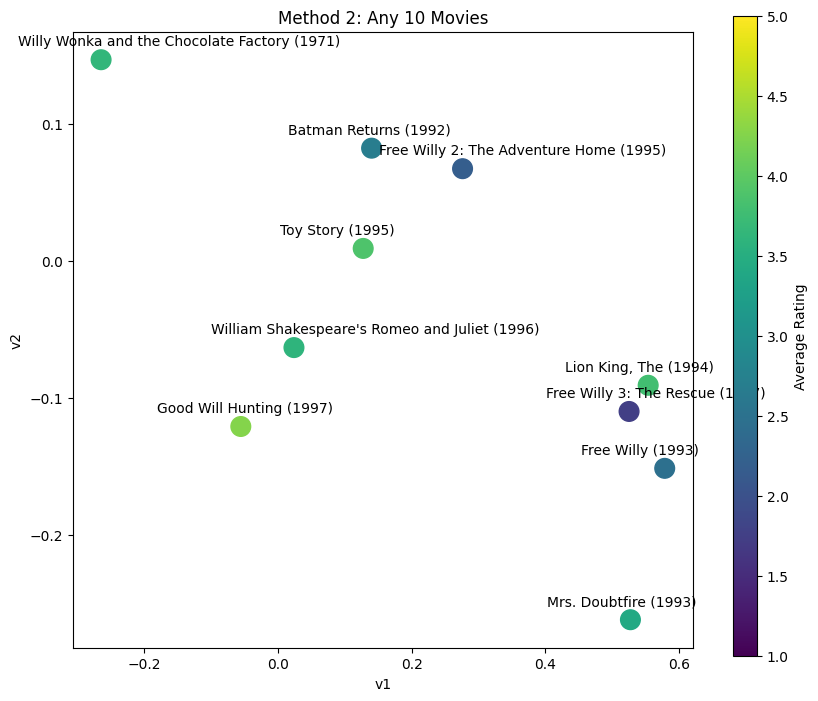

In [39]:
indices = [0, 34, 70, 77, 150, 230, 271, 392, 420, 456]
movie_ids = movies['Movie ID'][indices].to_numpy()
movie_labels = movies['Movie Title'][indices].to_numpy()
avg_rating_data = data.groupby(by='Movie ID')['Rating'].mean()
avg_ratings = avg_rating_data.iloc[indices].to_numpy()
print(movie_ids)
print(movie_labels)
print(avg_ratings)
visualize_movies(V_tilda_bias, indices, movie_labels, 'Method 2: Any 10 Movies', avg_ratings)

(b) The ten most popular movies (movies which have received the most ratings)

[ 50 258 100 181 294 286 288   1 300 121]
['Star Wars (1977)' 'Contact (1997)' 'Fargo (1996)'
 'Return of the Jedi (1983)' 'Liar Liar (1997)'
 'English Patient, The (1996)' 'Scream (1996)' 'Toy Story (1995)'
 'Air Force One (1997)' 'Independence Day (ID4) (1996)']
[4.35849057 3.80353635 4.15551181 4.00788955 3.15670103 3.65696466
 3.44142259 3.87831858 3.63109049 3.43822844]


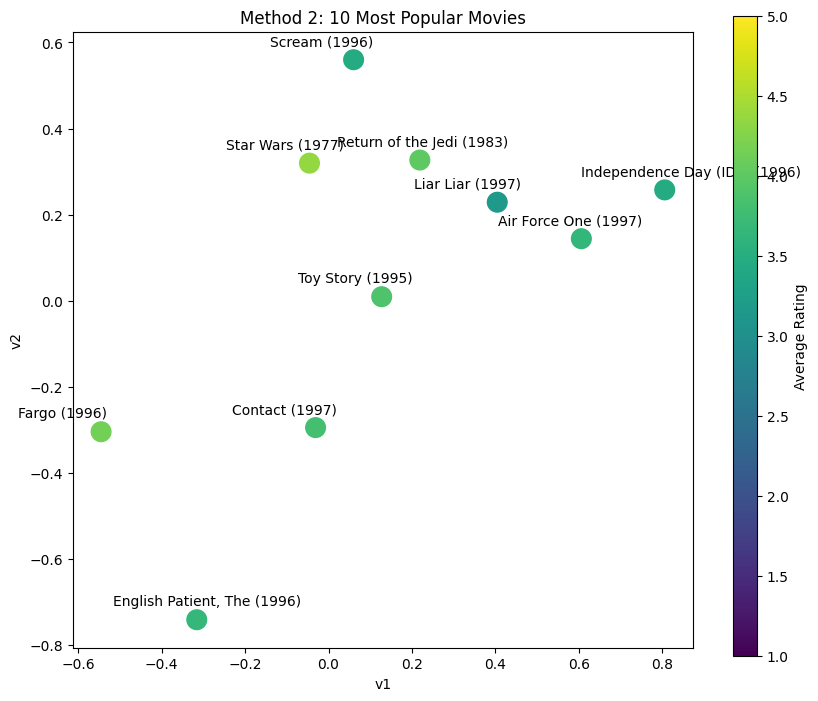

In [42]:
most_popular_ids = data['Movie ID'].value_counts().nlargest(10).index.to_numpy()
indices = [i - 1 for i in most_popular_ids]
movie_labels = movies['Movie Title'][indices].to_numpy()
avg_rating_data = data.groupby(by='Movie ID')['Rating'].mean()
avg_ratings = avg_rating_data.iloc[indices].to_numpy()
print(most_popular_ids)
print(movie_labels)
print(avg_ratings)
visualize_movies(V_tilda_bias, indices, movie_labels, 'Method 2: 10 Most Popular Movies', avg_ratings)

(c) The ten best movies (movies with the highest average ratings).

Int64Index([50, 258, 100, 181, 294, 286, 288, 1, 300, 121], dtype='int64')
['Great Day in Harlem, A (1994)' 'They Made Me a Criminal (1939)'
 'Prefontaine (1997)' 'Marlene Dietrich: Shadow and Light (1996) '
 'Star Kid (1997)' 'Saint of Fort Washington, The (1993)'
 'Santa with Muscles (1996)' 'Aiqing wansui (1994)'
 "Someone Else's America (1995)"
 'Entertaining Angels: The Dorothy Day Story (1996)']
[5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]


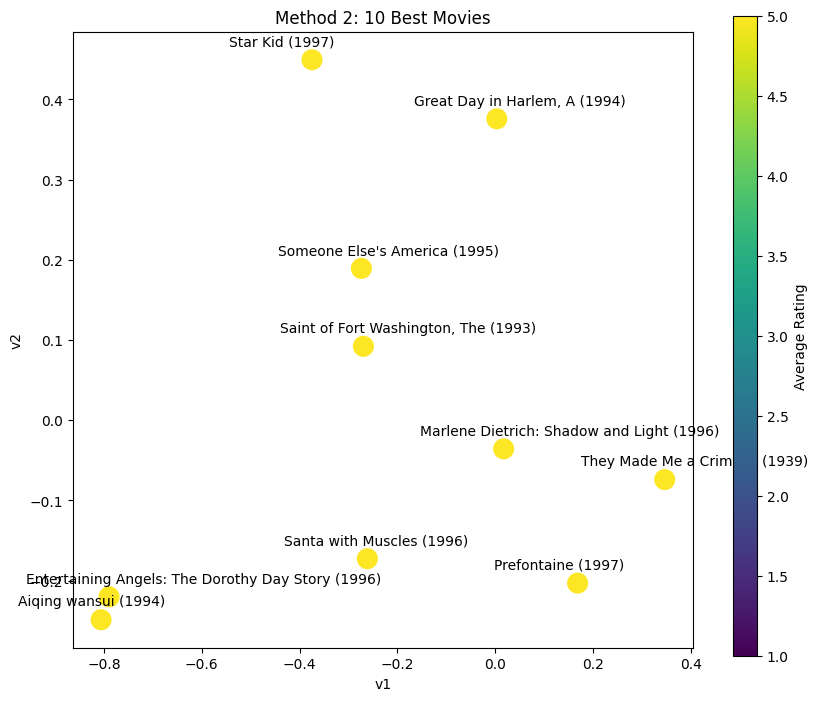

In [45]:
avg_rating_data = data.groupby(by='Movie ID')['Rating'].mean()
highest_movie_ids = avg_rating_data.nlargest(10).index
indices = [i - 1 for i in highest_movie_ids]
movie_labels = movies['Movie Title'][indices].to_numpy()
avg_ratings = avg_rating_data.iloc[indices].to_numpy()
print(most_popular)
print(movie_labels)
print(avg_ratings)
visualize_movies(V_tilda_bias, indices, movie_labels, 'Method 2: 10 Best Movies', avg_ratings)

d) Ten movies from the three genres you selected in Section 4, Basic Visualizations (for a total of 30 movies). Create one visualization, containing ten movies, for each of the three genres you select.

Action:['Psycho (1960)' 'Belle de jour (1967)' 'Pollyanna (1960)'
 'Sling Blade (1996)' 'Star Trek: The Wrath of Khan (1982)'
 'Star Trek III: The Search for Spock (1984)' 'Grosse Pointe Blank (1997)'
 'Ghost in the Shell (Kokaku kidotai) (1995)' 'Local Hero (1983)'
 'Inventing the Abbotts (1997)']
Animation:['Jack (1996)' 'Terminator 2: Judgment Day (1991)' 'Mary Poppins (1964)'
 'E.T. the Extra-Terrestrial (1982)'
 'Big Blue, The (Grand bleu, Le) (1988)'
 'Haunted World of Edward D. Wood Jr., The (1995)'
 'To Kill a Mockingbird (1962)'
 'Last Time I Committed Suicide, The (1997)' 'Fargo (1996)'
 'Anna Karenina (1997)']
Romance:['Nadja (1994)' 'Leaving Las Vegas (1995)' 'Caught (1996)'
 'Nikita (La Femme Nikita) (1990)' 'Very Brady Sequel, A (1996)'
 "'Til There Was You (1997)" 'Target (1995)' 'Sliver (1993)'
 'Aladdin and the King of Thieves (1996)'
 'Vie est belle, La (Life is Rosey) (1987)']


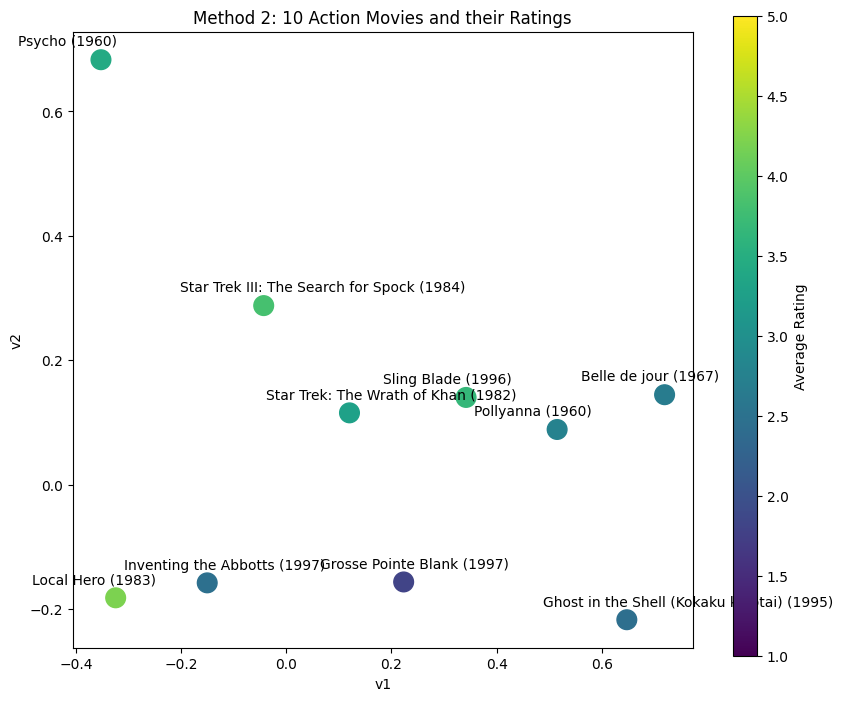

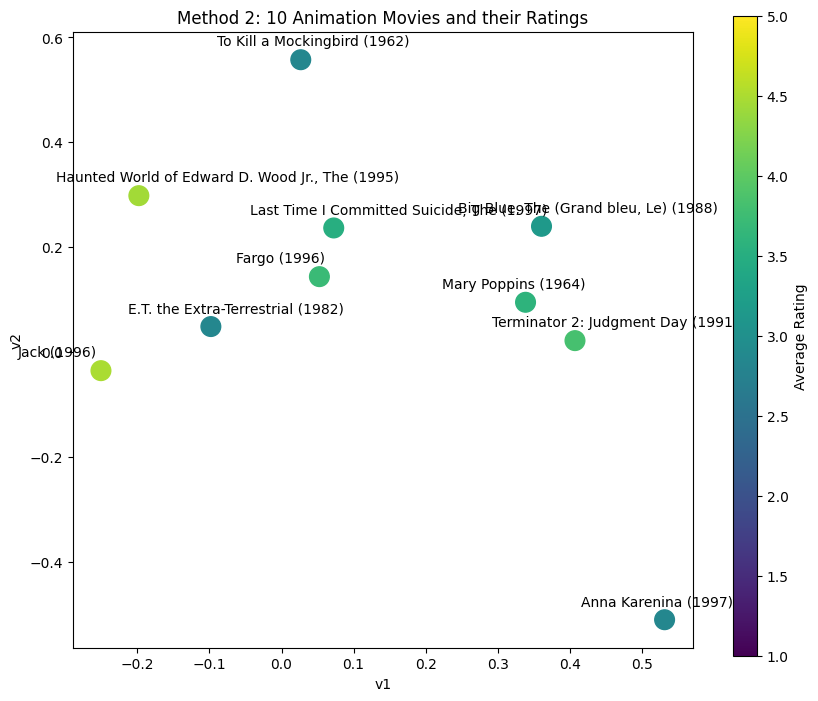

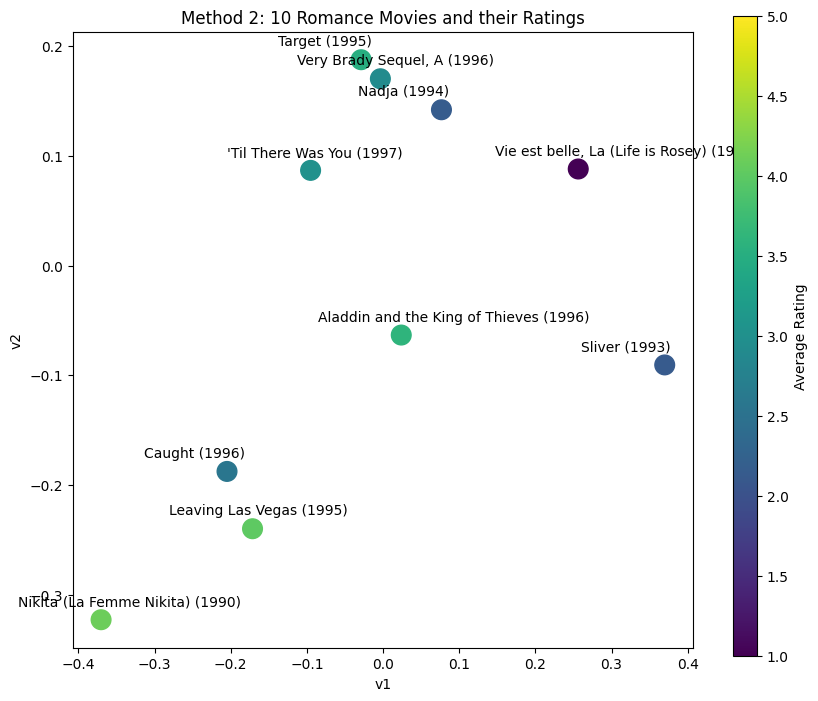

In [58]:
print('Action:{}'.format(action_labels))
print('Animation:{}'.format(animation_labels))
print('Romance:{}'.format(romance_labels))

visualize_movies(V_tilda_bias, action_movie_ids - 1, action_labels, 'Method 2: 10 Action Movies and their Ratings', action_ratings)
visualize_movies(V_tilda_bias, animation_movie_ids - 1, animation_labels, 'Method 2: 10 Animation Movies and their Ratings', animation_ratings)
visualize_movies(V_tilda_bias, romance_movie_ids - 1, romance_labels, 'Method 2: 10 Romance Movies and their Ratings', romance_ratings)

## Off the Shelf Implementation

In [26]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163001 sha256=d9eebeb5c09be17fc181c1d17e5b26b8d4eeba4b7074feeac032cab28f781825
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [27]:
from surprise import accuracy, Dataset, SVD, Reader
from surprise.model_selection import cross_validate, train_test_split

reader = Reader()
trainset = Dataset.load_from_df(data, reader)

algo = SVD(n_epochs=300, n_factors=20, lr_all = 0.01, reg_all = 0.1)

trainset = trainset.build_full_trainset()
algo.fit(trainset)
V_tilda_shelf = algo.qi.T
print(V_tilda_shelf.shape)

(20, 1682)


In [28]:
dataset = Dataset.load_from_df(data, reader)
cross_validate(algo, dataset, measures=['MSE'], cv=10, verbose=True)

Evaluating MSE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
MSE (testset)     0.8323  0.8248  0.8281  0.8142  0.8334  0.8632  0.8452  0.8275  0.8148  0.8413  0.8325  0.0139  
Fit time          25.87   13.85   13.61   13.62   13.65   13.62   13.71   14.45   14.64   13.74   15.08   3.61    
Test time         0.10    0.05    0.05    0.05    0.06    0.09    0.11    0.09    0.06    0.05    0.07    0.02    


{'test_mse': array([0.83230728, 0.82477483, 0.8280543 , 0.81420551, 0.83335203,
        0.86319681, 0.84521868, 0.82746533, 0.81481051, 0.84131019]),
 'fit_time': (25.869308948516846,
  13.854966640472412,
  13.608345985412598,
  13.6220862865448,
  13.650776147842407,
  13.623751640319824,
  13.714796781539917,
  14.453147172927856,
  14.639952898025513,
  13.744991302490234),
 'test_time': (0.09740304946899414,
  0.0533144474029541,
  0.052631378173828125,
  0.05333828926086426,
  0.05508303642272949,
  0.0938270092010498,
  0.10666251182556152,
  0.09366893768310547,
  0.05562734603881836,
  0.0533599853515625)}

(a) Any ten movies of your choice from the MovieLens dataset.

[  1  35  71  78 151 231 272 393 421 457]
['Toy Story (1995)' 'Free Willy 2: The Adventure Home (1995)'
 'Lion King, The (1994)' 'Free Willy (1993)'
 'Willy Wonka and the Chocolate Factory (1971)' 'Batman Returns (1992)'
 'Good Will Hunting (1997)' 'Mrs. Doubtfire (1993)'
 "William Shakespeare's Romeo and Juliet (1996)"
 'Free Willy 3: The Rescue (1997)']
[3.87831858 2.18181818 3.78181818 2.45454545 3.63190184 2.68309859
 4.26262626 3.41145833 3.59433962 1.74074074]


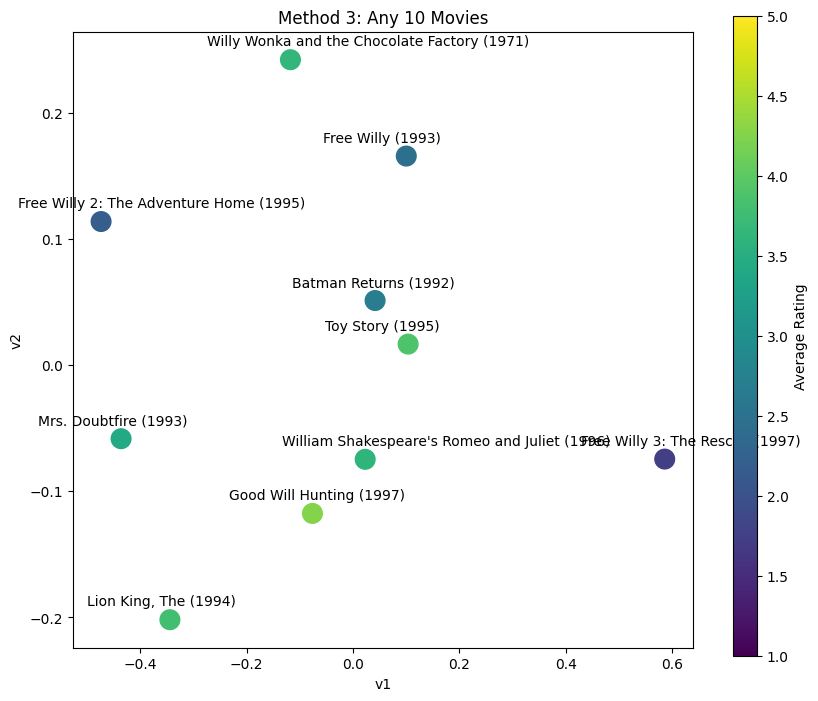

In [40]:
indices = [0, 34, 70, 77, 150, 230, 271, 392, 420, 456]
movie_ids = movies['Movie ID'][indices].to_numpy()
movie_labels = movies['Movie Title'][indices].to_numpy()
avg_rating_data = data.groupby(by='Movie ID')['Rating'].mean()
avg_ratings = avg_rating_data.iloc[indices].to_numpy()
print(movie_ids)
print(movie_labels)
print(avg_ratings)
visualize_movies(V_tilda_shelf, indices, movie_labels, 'Method 3: Any 10 Movies', avg_ratings)

(b) The ten most popular movies (movies which have received the most ratings)

[ 50 258 100 181 294 286 288   1 300 121]
['Star Wars (1977)' 'Contact (1997)' 'Fargo (1996)'
 'Return of the Jedi (1983)' 'Liar Liar (1997)'
 'English Patient, The (1996)' 'Scream (1996)' 'Toy Story (1995)'
 'Air Force One (1997)' 'Independence Day (ID4) (1996)']
[4.35849057 3.80353635 4.15551181 4.00788955 3.15670103 3.65696466
 3.44142259 3.87831858 3.63109049 3.43822844]


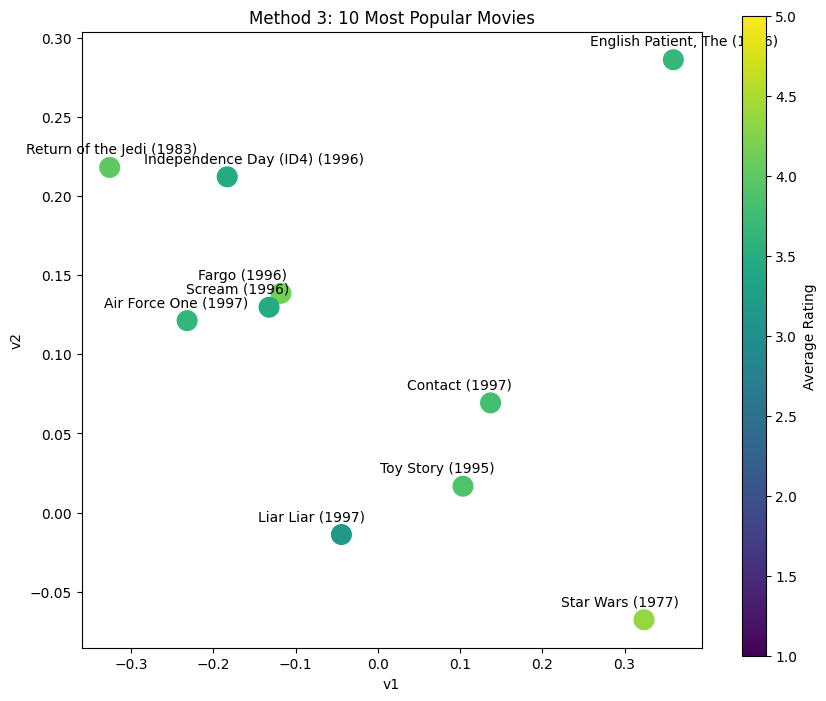

In [43]:
most_popular_ids = data['Movie ID'].value_counts().nlargest(10).index.to_numpy()
indices = [i - 1 for i in most_popular_ids]
movie_labels = movies['Movie Title'][indices].to_numpy()
avg_rating_data = data.groupby(by='Movie ID')['Rating'].mean()
avg_ratings = avg_rating_data.iloc[indices].to_numpy()
print(most_popular_ids)
print(movie_labels)
print(avg_ratings)
visualize_movies(V_tilda_shelf, indices, movie_labels, 'Method 3: 10 Most Popular Movies', avg_ratings)

(c) The ten best movies (movies with the highest average ratings).

Int64Index([50, 258, 100, 181, 294, 286, 288, 1, 300, 121], dtype='int64')
['Great Day in Harlem, A (1994)' 'They Made Me a Criminal (1939)'
 'Prefontaine (1997)' 'Marlene Dietrich: Shadow and Light (1996) '
 'Star Kid (1997)' 'Saint of Fort Washington, The (1993)'
 'Santa with Muscles (1996)' 'Aiqing wansui (1994)'
 "Someone Else's America (1995)"
 'Entertaining Angels: The Dorothy Day Story (1996)']
[5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]


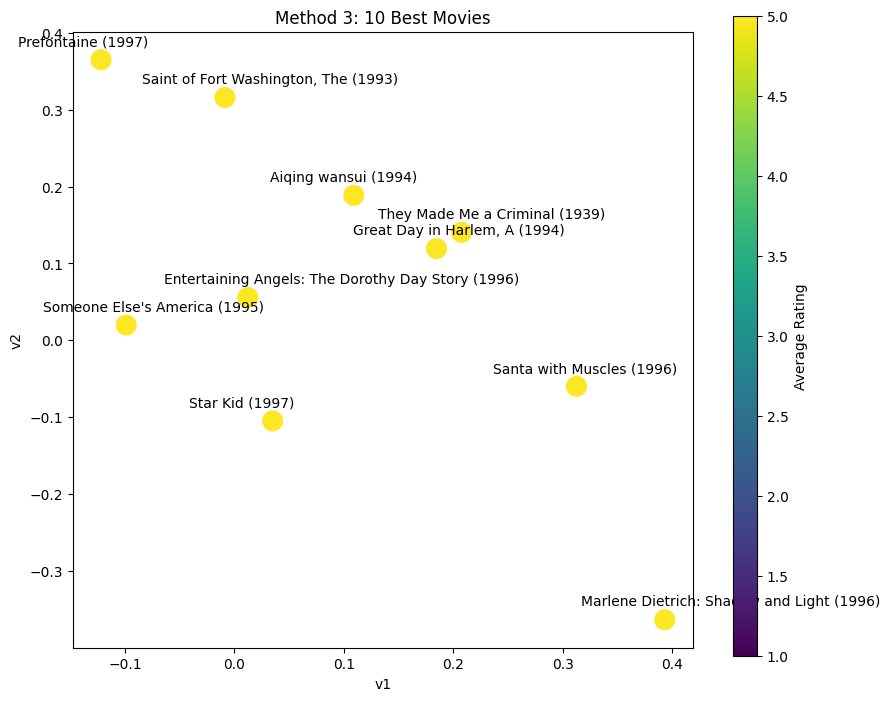

In [46]:
avg_rating_data = data.groupby(by='Movie ID')['Rating'].mean()
highest_movie_ids = avg_rating_data.nlargest(10).index
indices = [i - 1 for i in highest_movie_ids]
movie_labels = movies['Movie Title'][indices].to_numpy()
avg_ratings = avg_rating_data.iloc[indices].to_numpy()
print(most_popular)
print(movie_labels)
print(avg_ratings)
visualize_movies(V_tilda_shelf, indices, movie_labels, 'Method 3: 10 Best Movies', avg_ratings)

d) Ten movies from the three genres you selected in Section 4, Basic Visualizations (for a total of 30 movies). Create one visualization, containing ten movies, for each of the three genres you select.

Action:['Psycho (1960)' 'Belle de jour (1967)' 'Pollyanna (1960)'
 'Sling Blade (1996)' 'Star Trek: The Wrath of Khan (1982)'
 'Star Trek III: The Search for Spock (1984)' 'Grosse Pointe Blank (1997)'
 'Ghost in the Shell (Kokaku kidotai) (1995)' 'Local Hero (1983)'
 'Inventing the Abbotts (1997)']
Animation:['Jack (1996)' 'Terminator 2: Judgment Day (1991)' 'Mary Poppins (1964)'
 'E.T. the Extra-Terrestrial (1982)'
 'Big Blue, The (Grand bleu, Le) (1988)'
 'Haunted World of Edward D. Wood Jr., The (1995)'
 'To Kill a Mockingbird (1962)'
 'Last Time I Committed Suicide, The (1997)' 'Fargo (1996)'
 'Anna Karenina (1997)']
Romance:['Nadja (1994)' 'Leaving Las Vegas (1995)' 'Caught (1996)'
 'Nikita (La Femme Nikita) (1990)' 'Very Brady Sequel, A (1996)'
 "'Til There Was You (1997)" 'Target (1995)' 'Sliver (1993)'
 'Aladdin and the King of Thieves (1996)'
 'Vie est belle, La (Life is Rosey) (1987)']


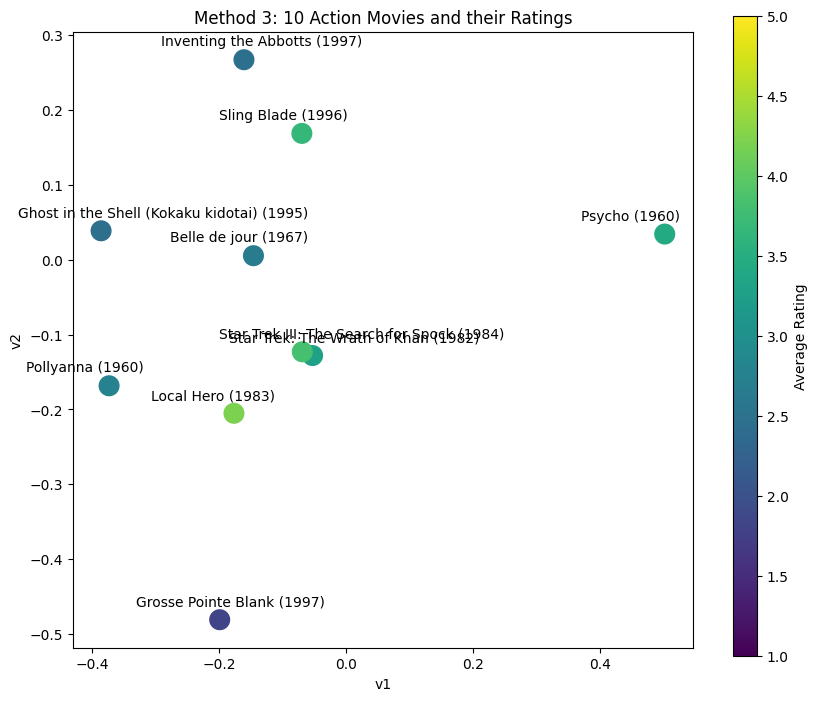

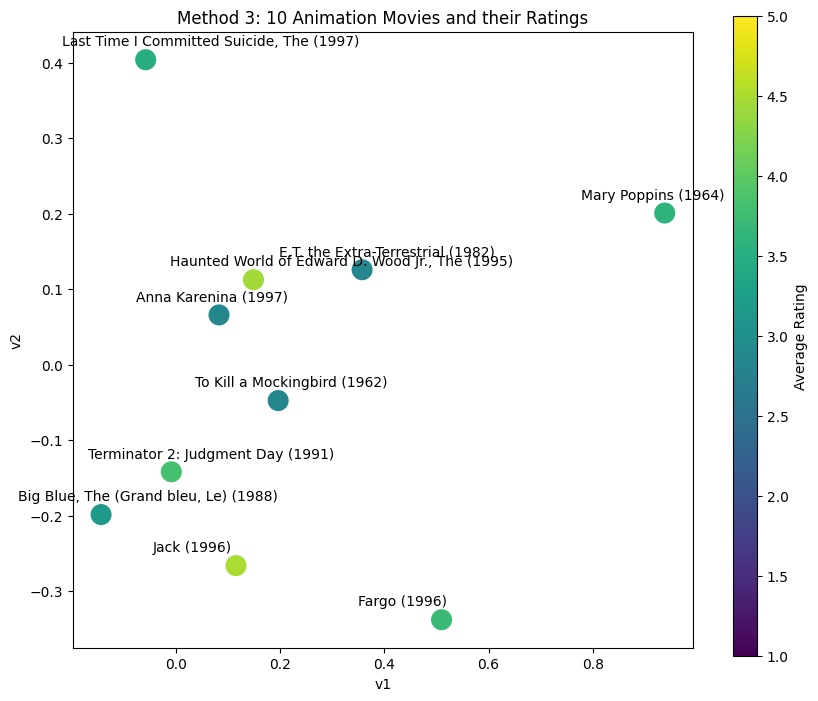

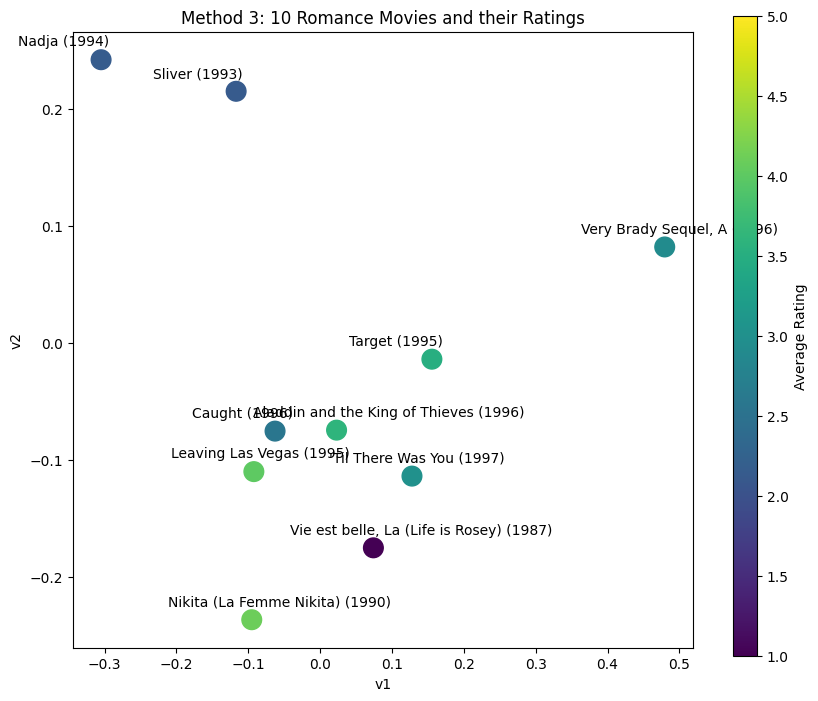

In [59]:
print('Action:{}'.format(action_labels))
print('Animation:{}'.format(animation_labels))
print('Romance:{}'.format(romance_labels))

visualize_movies(V_tilda_shelf, action_movie_ids - 1, action_labels, 'Method 3: 10 Action Movies and their Ratings', action_ratings)
visualize_movies(V_tilda_shelf, animation_movie_ids - 1, animation_labels, 'Method 3: 10 Animation Movies and their Ratings', animation_ratings)
visualize_movies(V_tilda_shelf, romance_movie_ids - 1, romance_labels, 'Method 3: 10 Romance Movies and their Ratings', romance_ratings)